In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head(3)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


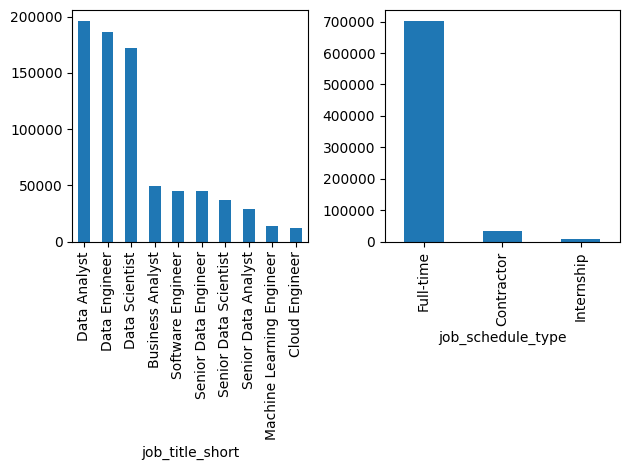

In [4]:
fig , ax = plt.subplots(1,2)


df['job_title_short'].value_counts().sort_values(ascending=False).plot(kind='bar',ax=ax[0])
# same way of doing it but using bar which is robost
# ax[0].bar(df['job_title_short'].value_counts().sort_values(ascending=False).index ,df['job_title_short'].value_counts().sort_values(ascending=False))


df['job_schedule_type'].value_counts().sort_values(ascending=False).head(3).plot(kind='bar',ax=ax[1])
# ax[1].bar(df['job_schedule_type'].value_counts().sort_values(ascending=False).head(3).index,df['job_schedule_type'].value_counts().sort_values(ascending=False).head(3).values)

fig.tight_layout()

In [26]:
# Counts of Top skills in data fields
df_Top = df.copy()
df_Top = df_Top.explode('job_skills')
skills_counts = df_Top.groupby(['job_skills','job_title_short']).size()
df_piivot = skills_counts.reset_index(name='skills_counts')
df_piivot = df_piivot.sort_values(by='skills_counts',ascending=False)

df_piivot

,job_skills,job_title_short,skills_counts
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
1723,shogun,Business Analyst,1
447,delphi,Senior Data Scientist,1
2124,visualbasic,Software Engineer,1
450,digitalocean,Business Analyst,1


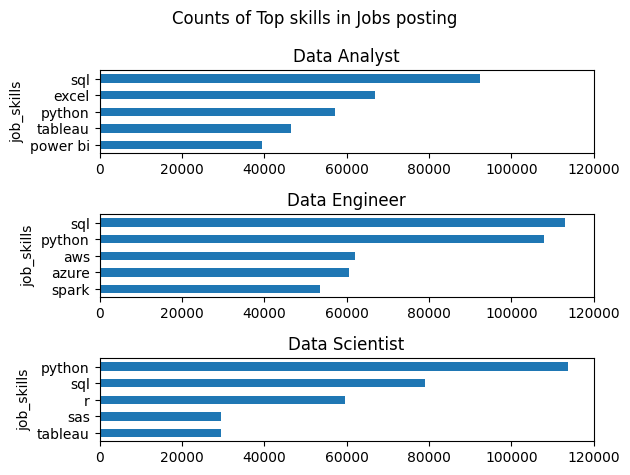

In [41]:
fig , ax = plt.subplots(3,1)
Four_jobs = df['job_title_short'].value_counts().sort_values(ascending=False).head(3).index.to_list() 

for i , Four_job  in enumerate(Four_jobs):
    # print(i)
    df_piivot[df_piivot['job_title_short']==Four_job].head(5).plot(kind='barh',x='job_skills',y='skills_counts', ax=ax[i],title=Four_job)
    ax[i].invert_yaxis()
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)

fig.suptitle('Counts of Top skills in Jobs posting')
fig.tight_layout()
# df_piivot[df_piivot['job_title_short']==Four_jobs[0]].head(5).plot(kind='barh',ax=ax[1])
# df_piivot